# Practice Session 01+02: Data preparation

Author: <font color="blue">Nil Tomàs Plans</font>

E-mail: <font color="blue">nil.tomas01@estudiant.upf.edu</font>

Date: <font color="blue">29/09/2024</font>

# 1. Exploratory data analysis 

In [90]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [91]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")


## 1.1. Data types and simple statistics

In [92]:
#code to print the dataset header (column names) and the first five rows of data
print("headers: ",input_dataset.columns,"\n")
print(input_dataset[:5])

headers:  Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object') 

                                    PURCHASED_DEVICE  DEVICE_VALUE  \
0  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...        393.00   

<font size="+1" color="red">Replace this cell with your code to print the dataset header (column names) and the first five rows of data.</font>

In [93]:
#code to create and display a dataframe containing one row per column, 
#and with the following fields: name of the column, type, number of distinct elements, and size.
#The size of all columns should be equal.
df=input_dataset.copy()

column_list = []#list to keep the data of each column
for column in df.columns:
    
    column_list.append({"Name ": column,"type ": df[column].dtype,"num dif elements": df[column].nunique(),
                           "size": df[column].size})

column_type_df=pd.DataFrame(column_list)
display(column_type_df)

#I have displayed the dataset in different columns and I observe that the size of the column its the same in all of them: 10000

,Name,type,num dif elements,size
0,PURCHASED_DEVICE,object,101,10000
1,DEVICE_VALUE,float64,368,10000
2,LAST_DEVICE_CHANGE,float64,76,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, and with the following fields: name of the column, type, number of distinct elements, and size. The size of all columns should be equal.</font>

In [94]:
#code to create and display a dataframe containing one row per each column 
#of type float64 in the input data, and with the following fields:
#name of the column, mean, median, min, max -- all computed ignoring NaN values.


series = []
for column in df.columns: #for each column in the dataset we
    if df[column].dtype=="float64":#check if the column format is float64 as the exercice requires. Also we needed 
        #to compute the different operations
        series.append({"Name": column ,"Mean": np.nanmean(df[column]) ,"Median": np.nanmedian(df[column]),
                               "Min": np.nanmin(df[column]), "Max": np.nanmax(df[column])})
    else: #if its another datatype
        print("Column",column," of type different to float64: ",df[column].dtype)

dataframe=pd.DataFrame(series)

pd.options.display.float_format ='{:.2f}'.format #display with two decimals of precision

display(dataframe)

Column PURCHASED_DEVICE  of type different to float64:  object
Column PREVIOUS_DEVICE_MODEL  of type different to float64:  object
Column PREVIOUS_DEVICE_MANUF  of type different to float64:  object
Column PREVIOUS_DEVICE_BRAND  of type different to float64:  object


,Name,Mean,Median,Min,Max
0,DEVICE_VALUE,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,0.00,3132.10


<font size="+1" color="red">Replace this cell with code to create and display a dataframe containing one row per each column of type ``float64`` in the input data, and with the following fields: name of the column, mean, median, min, max -- all computed ignoring NaN values.</font>

In [95]:
# code to print each column name and then use the describe 
#function to print statistics for that column. Include a blank line after each description.
for column in df.columns:
    print("Statistics for ",column,":")
    print(input_dataset[column].describe())
    print()

Statistics for  PURCHASED_DEVICE :
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object

Statistics for  DEVICE_VALUE :
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64

Statistics for  LAST_DEVICE_CHANGE :
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64

Statistics for  DATA_TRAFFIC_MONTH_1 :
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

Statistics for  DATA_TRAF

<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

<font size="+1" color="blue">If we analyse the statistics for column duration_line we see that the mean is the same in both, the median is the same as the 50% because they both describe the value that divides the dataset into two equal halves. Following the next parameters, tne min and max are in both exercices the same. Additionally, using the describe funciton there are more computations done, like the first percentile (25%) and the third one(75%). Also we find the standard deviation and the count. </font>

<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DURATION_LINE** (time that the customer has had a line) with the ones from the `describe` function.</font>

<font size="+1" color="red">Indicate all the differences between the statistics that `describe` computed, and the statistics you computed (e.g., missing or extra computations).</font>

## 1.2. Inventory of device models

In [96]:
#code to display a census of PREVIOUS_DEVICE_MODEL 
#and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.

frequency_count=df["PREVIOUS_DEVICE_MODEL"].value_counts().reset_index()#count each time a model appears and use reset_index() to create the dataframe format data
frequency_count.columns=["Device model","Frequency"]#change the name of the columns
display(frequency_count)

frequency_count=df["PREVIOUS_DEVICE_BRAND"].value_counts().reset_index()
frequency_count.columns=["Device brand","Frequency"]
display(frequency_count)



,Device model,Frequency
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
575,LG Optimus L3 II,1
576,"Lenovo S930,Lenovo S939",1
577,Samsung Corby II,1
578,SGH-U600,1


,Device brand,Frequency
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

<font size="+1" color="blue">In my opinion it could be due to an imbalance on the frequency of the device model of the brand. That means that even if the first and second device most selled are from the same brand (Apple), there exists also the possibility that other brands like Samsung have lots of models with less frequency but when we sum all the frequencies they are higher than the brand of the top devices </font>

<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

# 2. Feature engineering

## 2.1. Missing values management

In [97]:
#code to print all columns that contain at least one NaN value, and what is the percentage of NaN values in that column.
#(Create a dataframe with this information, and then display it.)

llista=[]

for column in df.columns:#recorrem totes les columnes
    if df[column].isna().sum() > 0: #si troba valors NaN, la funció isna() retornarà true, i acumularem els valors
        llista.append({"Name":column,"Percentage of NaN %":(df[column].isna().sum()/len(df[column]))*100})
        #Afegim la columna a la llista i hi guardem el nom i el %

df_NaN=pd.DataFrame(llista)#creem el dataframe

display(df_NaN)

    

,Name,Percentage of NaN %
0,PURCHASED_DEVICE,1.47
1,DEVICE_VALUE,3.10
2,LAST_DEVICE_CHANGE,23.18
3,DATA_TRAFFIC_MONTH_1,11.32
4,DATA_TRAFFIC_MONTH_2,11.59
5,DATA_TRAFFIC_MONTH_3,11.54
6,DATA_TRAFFIC_MONTH_4,11.83
7,DATA_TRAFFIC_MONTH_5,11.34
8,DATA_TRAFFIC_MONTH_6,14.65
9,VOICE_TRAFFIC_MONTH_1,11.32


<font size="+1" color="red">Replace this cell with your code to print all columns that contain at least one NaN value, and what is the percentage of NaN values in that column. (Create a dataframe with this information, and then display it.)</font>

In [98]:
#code to remove those rows PURCHASED_DEVICE, DEVICE_VALUE, or PREVIOUS_DEVICE_MODEL




df.dropna(subset=["PURCHASED_DEVICE", "DEVICE_VALUE", "PREVIOUS_DEVICE_MODEL"],inplace=True)
display(df)
#I apply the dropna to the columns PURCHASED_DEVICE, DEVICE_VALUE, or PREVIOUS_DEVICE_MODEL
#If a NaN is found in the columns outlined in the subset parameter the row is deleted with the second parameter
#if we didn't specify the subset, then if the code founds any NaN, it would delete the row


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [99]:
#first I create different groups of columns co create the strings of the names of columns
#as it was not efficient to write all 24 names of columns
c1=[f"DATA_TRAFFIC_MONTH_{i}" for i in range(1,7)]
c2=[f"VOICE_TRAFFIC_MONTH_{i}" for i in range(1, 7)]
c3=[f"BILLING_MONTH_{i}" for i in range(1, 7)]
c4=[f"DEVICE_COST_MONTH_{i}" for i in range(1, 7)]

columns=c1+c2+c3+c4 #I add them all together in an array columns
df[columns]=df[columns].fillna(0)#fill the NaN values with 0

display(df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [100]:
df['LINE_ACTIVATION_DATE']=df['LINE_ACTIVATION_DATE'].fillna(df['LAST_DEVICE_CHANGE'])

<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [101]:
display(df.head())

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [102]:
#code to print the number of rows of the original dataset, the number of rows of the new dataset, 
#and the percentage of rows that were dropped, 
#as well as the names of the columns that still contain NaN values, if any.

M = input_dataset.shape[0]  
N = df.shape[0]  

if M != 0:
    calcul = (100 * (M - N) / M)  
else:
    calcul = 0  

# results
print("Rows in the original dataset:", M)
print("Rows in the new dataset:", N, f"({calcul}% less)")  

names=[]#list with columns thatmay still have NaN values
for column in df.columns:
    if df[column].isna().any(): #si troba valors NaN, la funció isna() retornarà true, i acumularem els valors
        names.append({"Name":column})
        
print(names)
        
#we observe that there are still some clumns with NaN values, still some of them that we worked on. That's why in the case of
#line_activation_date if a value was found with NaN, the new value would be the one from the last_device_change, but we did not
#check if that value was NaN


Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less)
[{'Name': 'LAST_DEVICE_CHANGE'}, {'Name': 'LINE_ACTIVATION_DATE'}, {'Name': 'MONTHS_LAST_DEVICE'}, {'Name': 'DURATION_LINE'}]


<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

## 2.2. Distributions, outliers, and correlations

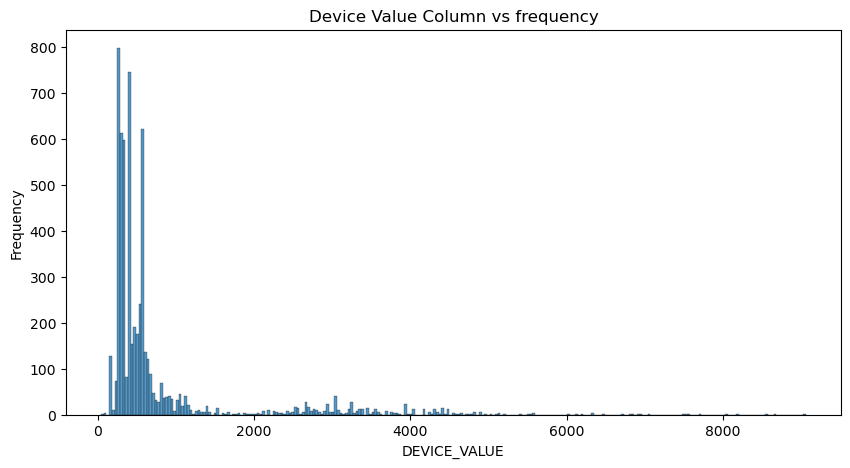

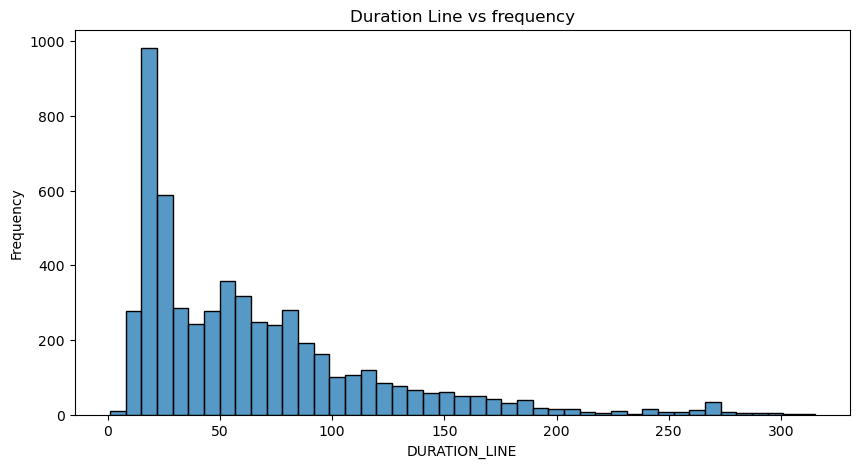

In [103]:
#code to plot a histogram of DEVICE_VALUE and DURATION_LINE. Remember to include a title, and labels on the x axis and y axis

#plotof the histogram of device_Value with a certain size, range of values
plt.figure(figsize=(10,5))
ax1 = sns.histplot(df['DEVICE_VALUE'])
ax1.set(title='Device Value Column vs frequency', xlabel='DEVICE_VALUE', ylabel='Frequency')
plt.show()

# Plot of the histogram of duration_line
plt.figure(figsize=(10, 5))
ax2 = sns.histplot(df['DURATION_LINE'])
ax2.set(title='Duration Line vs frequency', xlabel='DURATION_LINE', ylabel='Frequency')
plt.show()

<font size="+1" color="blue">In both plots I can identify alogarithmic distribution, that with bigger values of device_value and duration_line, the frequency decreases. Both appear to be unimodal, however, in the first plot I can identify a little increase of frequency around the device_Value of 3000 that make me think of bimodal </font>

<font size="+1" color="red">Replace this cell with code to plot a histogram of **DEVICE\_VALUE** and **DURATION\_LINE**. Remember to include a title, and labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

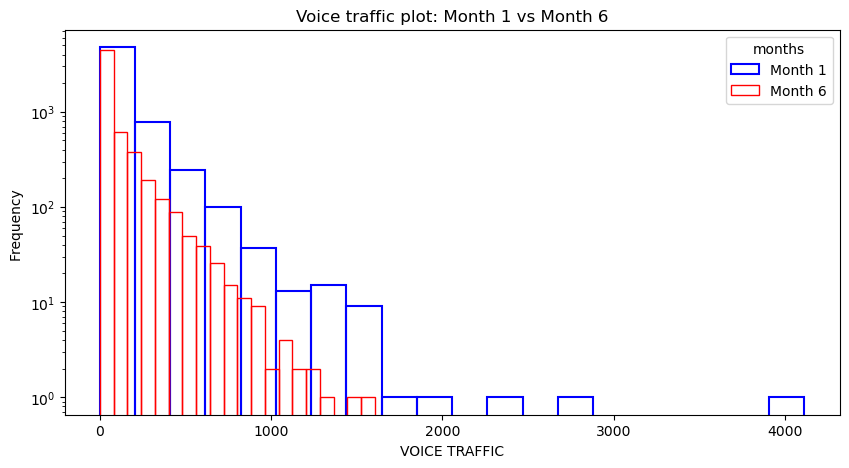

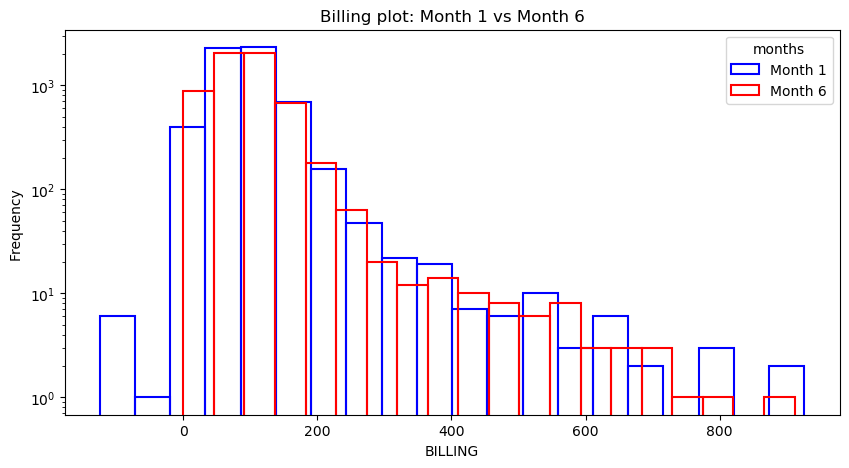

In [104]:
#code to plot a histogram comparing VOICE_TRAFFIC_MONTH_1 against VOICE_TRAFFIC_MONTH_6, 
#and BILLING_MONTH_1 against BILLING_MONTH_6. 
#Remember to include a title, labels on the x axis and y axis, and a legend.

#plot of the voice_traffic between month 1 and 6
plt.figure(figsize=(10, 5))#size of the plot
plt.yscale('log')#log scale on y axis
sns.histplot(df['VOICE_TRAFFIC_MONTH_1'], bins=20, color='blue', label='Month 1', fill=False)#plot data from month 1
sns.histplot(df['VOICE_TRAFFIC_MONTH_6'], bins=20, color='red', label='Month 6', fill=False)#plot data from month 6

plt.title('Voice traffic plot: Month 1 vs Month 6')
plt.xlabel('VOICE TRAFFIC')
plt.ylabel('Frequency ')
plt.legend(title='months')
plt.show()

#plot of billing between month 1 and 6
plt.figure(figsize=(10, 5))#size of the plot
plt.yscale('log')#log scale on y axis
sns.histplot(df['BILLING_MONTH_1'], bins=20, color='blue', label='Month 1', fill=False)#plot data from month 1
sns.histplot(df['BILLING_MONTH_6'], bins=20, color='red', label='Month 6', fill=False)#plot data from month 6
plt.title('Billing plot: Month 1 vs Month 6')

plt.xlabel('BILLING')
plt.ylabel('Frequency ')
plt.legend(title='months')
plt.show()


<font size="+1" color="blue">In both plots the shape of both months is very similar. In the first one, in the 6th month the voice traffic did reduced considerably compared to the 1st month. Instead, on the second plot, the bills on the 1st and 6th month are very similar in values</font>

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram comparing **VOICE\_TRAFFIC\_MONTH\_1** against **VOICE\_TRAFFIC\_MONTH\_6**, and **BILLING\_MONTH\_1** against **BILLING\_MONTH\_6**. Remember to include a title, labels on the x axis and y axis, and a legend.</font>

<font size="+1" color="red">Both plots should use logarithmic scale on the y axis</font>

<font size="+1" color="red">Include after both histograms your comment on the differences between month 1 and month 6.</font>

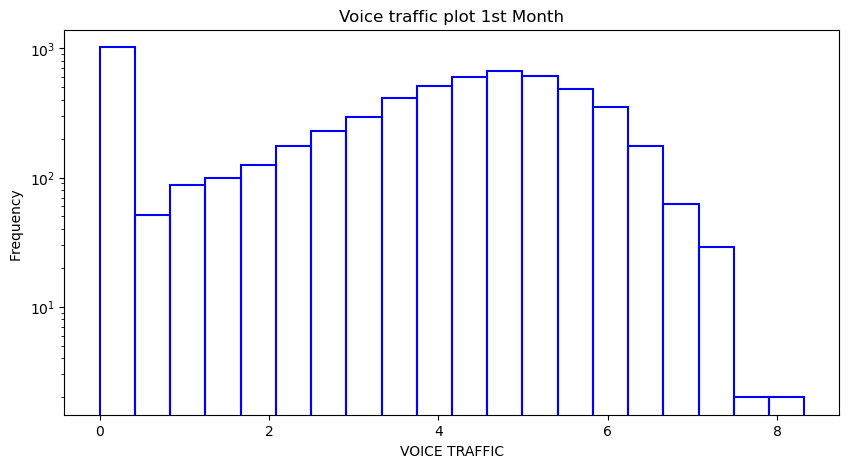

In [105]:


#we apply the log(x+1) considering that variable x are different values of the column of df['VOICE_TRAFFIC_MONTH_1']
df['VOICE_TRAFFIC_MONTH_1'] = np.log(df['VOICE_TRAFFIC_MONTH_1'] + 1)
plt.figure(figsize=(10, 5))#size of the plot
plt.yscale('log')#log scale on y axis
sns.histplot(df['VOICE_TRAFFIC_MONTH_1'], bins=20, color='blue', label='Month 1', fill=False)#plot data from month 1

plt.title('Voice traffic plot 1st Month')
plt.xlabel('VOICE TRAFFIC')
plt.ylabel('Frequency ')
plt.show()

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

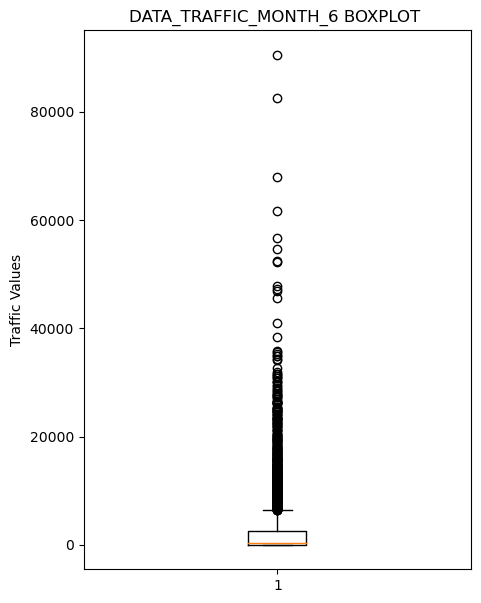

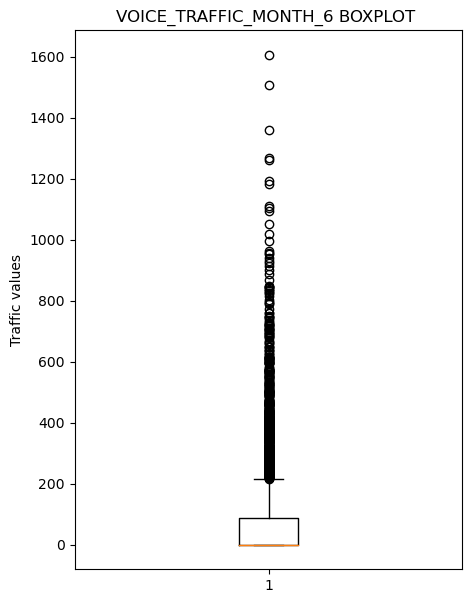

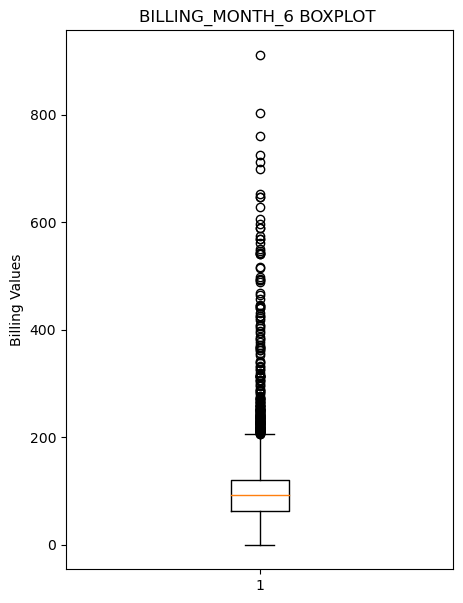

In [106]:
#code to create thre boxplots, each of them for one of the variables DATA_TRAFFIC_MONTH_6, VOICE_TRAFFIC_MONTH_6 and BILLING_MONTH_6. 
#Remember to include a title and a label for the y axis.

#boxplot of data traffic month 6
plt.figure(figsize=(5, 7))
plt.boxplot(df['DATA_TRAFFIC_MONTH_6'])
plt.title('DATA_TRAFFIC_MONTH_6 BOXPLOT ')
plt.ylabel('Traffic Values')
plt.show()

#boxplot of voice traffic month 6
plt.figure(figsize=(5, 7))
plt.boxplot(df['VOICE_TRAFFIC_MONTH_6'])
plt.title('VOICE_TRAFFIC_MONTH_6 BOXPLOT ')
plt.ylabel('Traffic values')
plt.show()

#boxplot of billing values month 6
plt.figure(figsize=(5, 7))
plt.boxplot(df['BILLING_MONTH_6'])
plt.title('BILLING_MONTH_6 BOXPLOT ')
plt.ylabel('Billing Values')
plt.show()



<font size="+1" color="red">Replace this cell with code to create thre boxplots, each of them for one of the  variables **DATA\_TRAFFIC\_MONTH\_6**, **VOICE\_TRAFFIC\_MONTH\_6** and **BILLING\_MONTH\_6**. Remember to include a title and a label for the y axis.</font>

<font size="+1" color="blue">I would use the extreme values as a threshold for the outliers the following values; plot 1:5000 aprox., plot 2:200 aprox. and plot 3: 200. All the data with values above those threshold will be considered outliers</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,...,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DEVICE_VALUE
DATA_TRAFFIC_MONTH_1,1.00,0.76,0.73,0.70,0.66,0.62,0.17,0.07,0.07,0.07,...,0.20,0.19,0.19,0.01,0.05,0.08,0.08,0.08,0.08,0.12
DATA_TRAFFIC_MONTH_2,0.76,1.00,0.97,0.79,0.76,0.69,0.15,0.08,0.08,0.07,...,0.19,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.11
DATA_TRAFFIC_MONTH_3,0.73,0.97,1.00,0.81,0.77,0.70,0.16,0.08,0.08,0.07,...,0.20,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.12
DATA_TRAFFIC_MONTH_4,0.70,0.79,0.81,1.00,0.83,0.72,0.16,0.09,0.09,0.09,...,0.20,0.21,0.22,0.01,0.05,0.07,0.07,0.07,0.07,0.12
DATA_TRAFFIC_MONTH_5,0.66,0.76,0.77,0.83,1.00,0.80,0.16,0.09,0.10,0.09,...,0.22,0.21,0.22,0.01,0.03,0.07,0.06,0.06,0.06,0.13
DATA_TRAFFIC_MONTH_6,0.62,0.69,0.70,0.72,0.80,1.00,0.15,0.08,0.08,0.08,...,0.20,0.19,0.20,0.01,0.05,0.09,0.07,0.07,0.08,0.12
VOICE_TRAFFIC_MONTH_1,0.17,0.15,0.16,0.16,0.16,0.15,1.00,0.60,0.60,0.58,...,0.17,0.18,0.17,-0.03,0.02,0.01,0.02,0.03,0.03,0.05
VOICE_TRAFFIC_MONTH_2,0.07,0.08,0.08,0.09,0.09,0.08,0.60,1.00,0.98,0.83,...,0.11,0.11,0.12,-0.01,0.00,-0.00,0.00,0.00,0.00,0.03
VOICE_TRAFFIC_MONTH_3,0.07,0.08,0.08,0.09,0.10,0.08,0.60,0.98,1.00,0.85,...,0.11,0.11,0.12,-0.01,0.01,-0.00,0.00,0.00,0.01,0.03
VOICE_TRAFFIC_MONTH_4,0.07,0.07,0.07,0.09,0.09,0.08,0.58,0.83,0.85,1.00,...,0.12,0.12,0.12,-0.01,0.01,0.01,-0.00,-0.00,0.01,0.02


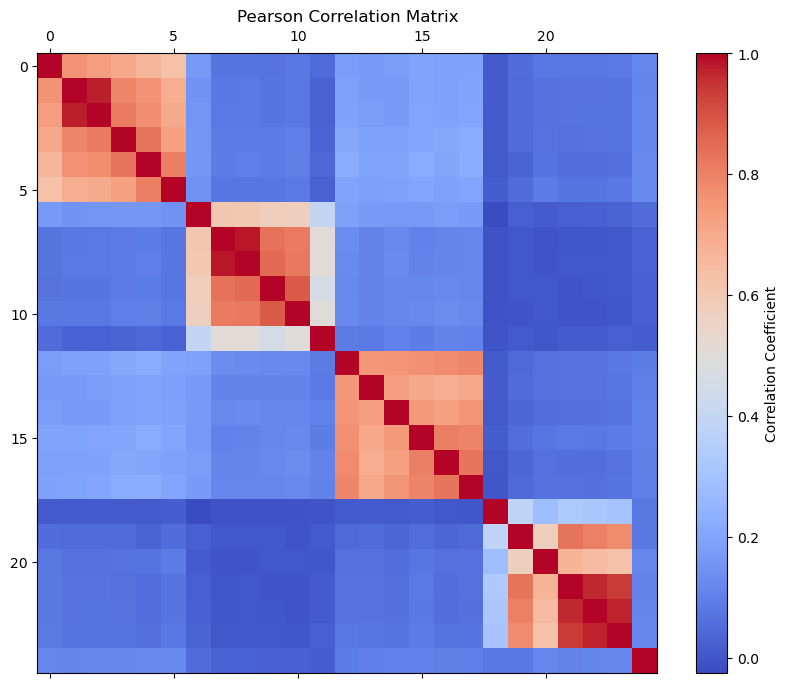

In [107]:
#code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, 
#device cost and device value. Display the result as a table with rows and columns corresponding to columns, 
#and cells indicating correlations.Display the result as an image using matshow

#as I have a lot of columns, first I decide to create all columns with string format
#and then, putting it all together "c", I create the dataframe and then
#I compute the Pearson correlations using "df_corr.corr(method='pearson', numeric_only=True)"

c1=[f"DATA_TRAFFIC_MONTH_{i}" for i in range(1,7)]
c2=[f"VOICE_TRAFFIC_MONTH_{i}" for i in range(1, 7)]
c3=[f"BILLING_MONTH_{i}" for i in range(1, 7)]
c4=[f"DEVICE_COST_MONTH_{i}" for i in range(1, 7)]
c5=[f'DEVICE_VALUE']
c=c1+c2+c3+c4+c5

df_corr=pd.DataFrame(df[c])
df_corr=df_corr.corr(method='pearson', numeric_only=True)
display(df_corr)#I display the matrix of correlation values to be able to identify 
#the categories of different data types

plt.figure(figsize=(10, 8)) #size of the figure
plt.matshow(df_corr, fignum=1, cmap='coolwarm')#we plot the values of matrix with a vary color

plt.colorbar(label='Correlation Coefficient')
plt.title('Pearson Correlation Matrix')

plt.show()

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

<font size="+1" color="blue">I observe that the billing is slightly more correlated to the data traffic rather than the voice traffic, because the blue color describing the correlation is lighter and that means a higher correlation </font>

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

## 2.3. Date management and period calculation

In [108]:
#code to create and print latest_change and now.
max_value=df['LAST_DEVICE_CHANGE'].max()
max_value=int(max_value)#convert to integer
max_value=str(max_value)#convert to string

latest_change = datetime.datetime.strptime(max_value, '%Y%m%d')#I convert to strptime
now = latest_change + datetime.timedelta(30)#I obtain the variable now by adding latest_change and 30 days using datetime.timedelta

#I print the outputs
print(latest_change)  
print(now)  

2019-05-01 00:00:00
2019-05-31 00:00:00


<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [109]:
#code that replaces the MONTHS_LAST_DEVICE column to be equal to the difference, in periods of 30 days,
#between LAST_DEVICE_CHANGE and the now variable.
series_converted = pd.to_datetime(df["LAST_DEVICE_CHANGE"], format='%Y%m%d')
difference=(now-series_converted)/(30*datetime.timedelta(days=1))
df["MONTHS_LAST_DEVICE"]=difference.copy()
df["MONTHS_LAST_DEVICE"]=df["MONTHS_LAST_DEVICE"].fillna(0).astype(int)
display(df["MONTHS_LAST_DEVICE"])

0        0
1       26
2        0
3       20
4        5
        ..
9994     0
9995    26
9996    14
9997     0
9999     0
Name: MONTHS_LAST_DEVICE, Length: 5988, dtype: int32

<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [110]:
#code to update the DURATION_LINE value to be the difference, in days, 
#between LINE_ACTIVATION_DATE and the now variable. 
#Indicate the average of DURATION_LINE


df["DURATION_LINE"] = (now - pd.to_datetime(df["LINE_ACTIVATION_DATE"], format='%Y%m%d')).dt.days 
#we need to add .dt.days to do the difference in days otherwise an error
average_durationline=df["DURATION_LINE"].sum()/len(df["DURATION_LINE"])
#we compute the average with the sum of the elements of the column "duration_line" and divide by the number of elements
print("average duration_line column, in days: ",average_durationline)
average_in_years=average_durationline/365
print("approximate average rouded in years: ",average_in_years.astype(int))#we rounded with .astype(int)

average duration_line column, in days:  1910.369906479626
approximate average rouded in years:  5


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable. Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>


## 2.4. Standarization and scaling of numerical variables

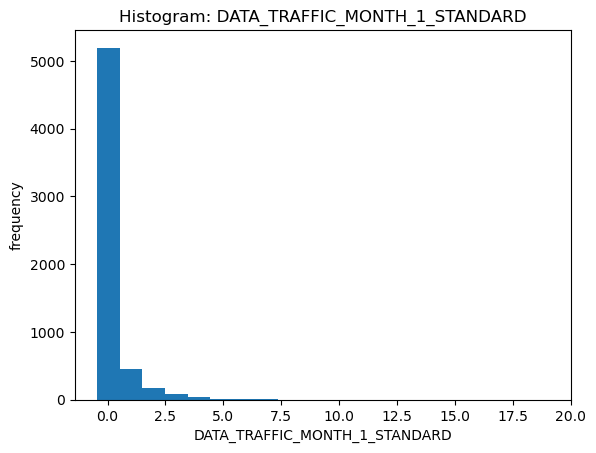

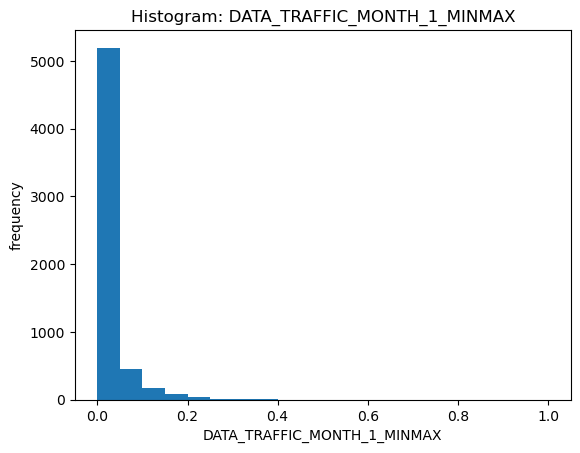

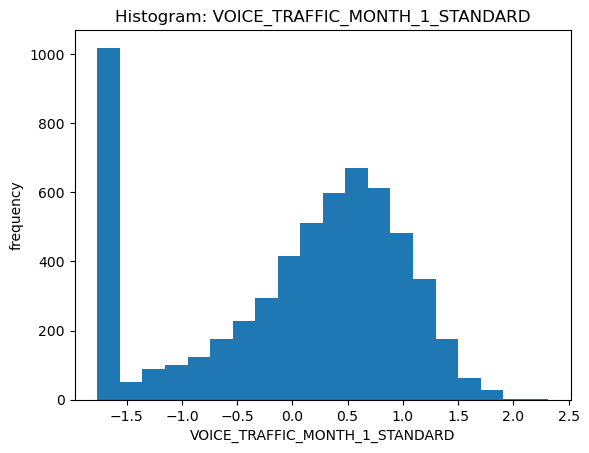

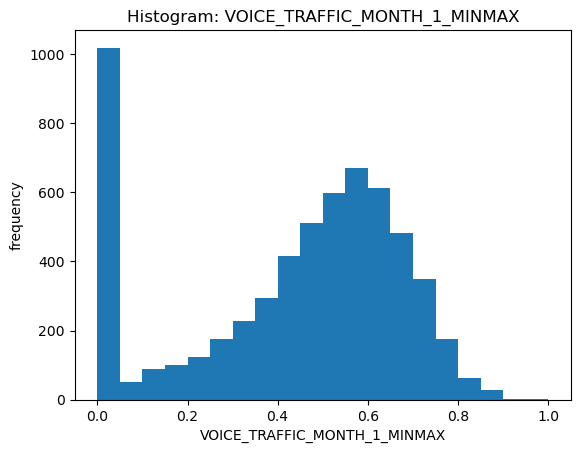

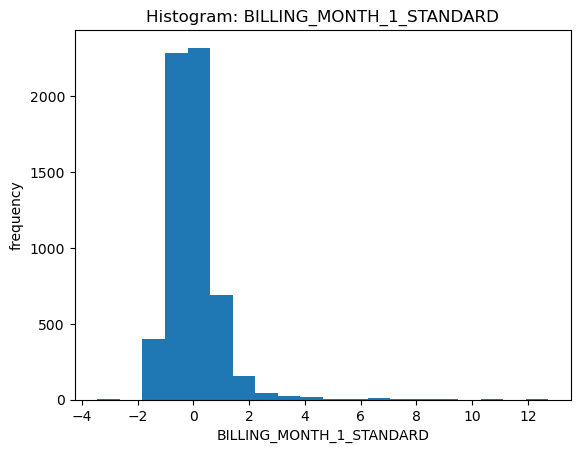

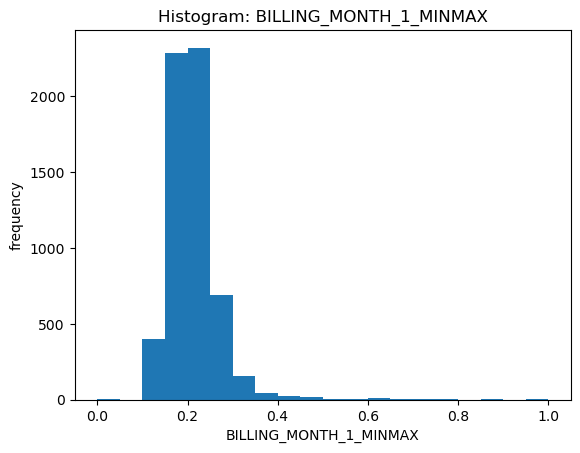

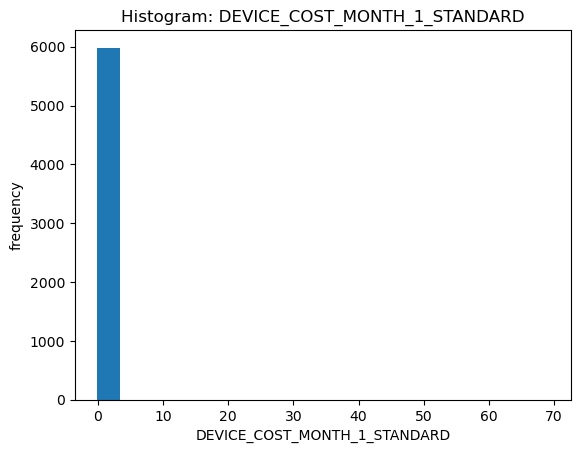

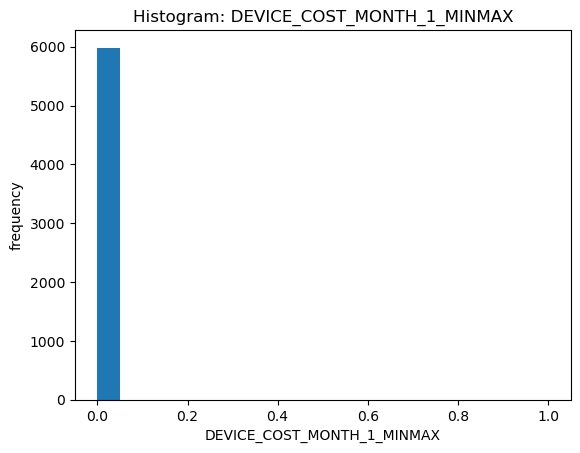

In [111]:
#code to standardize and min-max scale the DATA_TRAFFIC_MONTH_1, 
#VOICE_TRAFFIC_MONTH_1, BILLING_MONTH_1 and DEVICE_COST_MONTH_1 columns. 
#Save the results in new colums with the same name followed by _STANDARD 
#and _MINMAX (e.g., DATA_TRAFFIC_MONTH_1_STAND, DATA_TRAFFIC_MONTH_1_MINMAX).
#Plot a histogram for each new variable.

std_df=pd.DataFrame(df)


#standarization and min max of data traffic month1
std_df['DATA_TRAFFIC_MONTH_1_STANDARD']=StandardScaler().fit_transform(std_df[["DATA_TRAFFIC_MONTH_1"]])
std_df['DATA_TRAFFIC_MONTH_1_MINMAX']=MinMaxScaler().fit_transform(std_df[['DATA_TRAFFIC_MONTH_1']])

#standarization and min max of VOICE traffic month1
std_df['VOICE_TRAFFIC_MONTH_1_STANDARD']=StandardScaler().fit_transform(std_df[["VOICE_TRAFFIC_MONTH_1"]])
std_df['VOICE_TRAFFIC_MONTH_1_MINMAX']=MinMaxScaler().fit_transform(std_df[['VOICE_TRAFFIC_MONTH_1']])

#standarization and min max of BILLING month1
std_df['BILLING_MONTH_1_STANDARD']=StandardScaler().fit_transform(std_df[["BILLING_MONTH_1"]])
std_df['BILLING_MONTH_1_MINMAX']=MinMaxScaler().fit_transform(std_df[['BILLING_MONTH_1']])

#standarization and min max of DEVICE COST month1
std_df['DEVICE_COST_MONTH_1_STANDARD']=StandardScaler().fit_transform(std_df[["DEVICE_COST_MONTH_1"]])
std_df['DEVICE_COST_MONTH_1_MINMAX']=MinMaxScaler().fit_transform(std_df[['DEVICE_COST_MONTH_1']])

#array with the names of the new columns
new_columns = [
    'DATA_TRAFFIC_MONTH_1_STANDARD', 'DATA_TRAFFIC_MONTH_1_MINMAX',
    'VOICE_TRAFFIC_MONTH_1_STANDARD', 'VOICE_TRAFFIC_MONTH_1_MINMAX',
    'BILLING_MONTH_1_STANDARD', 'BILLING_MONTH_1_MINMAX',
    'DEVICE_COST_MONTH_1_STANDARD', 'DEVICE_COST_MONTH_1_MINMAX'
]


for col in new_columns:#for each column in the array I plot the histogram 
    plt.hist(std_df[col], bins=20)
    plt.title(f'Histogram: {col}')
    #titles of the {x,y} axis
    
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()


df=std_df.copy()


<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



## 2.5. Convert categorical columns to dummy binary variables

In [112]:
encoded_df=pd.DataFrame(df)#I create a copy of the dataframe

#I encode the variable requested and print the comparison
encoded_df["PREVIOUS_DEVICE_BRAND_INT_ENCODED"]=LabelEncoder().fit_transform(encoded_df["PREVIOUS_DEVICE_BRAND"])

print(encoded_df[["PREVIOUS_DEVICE_BRAND", "PREVIOUS_DEVICE_BRAND_INT_ENCODED"]])
df=encoded_df.copy()

     PREVIOUS_DEVICE_BRAND  PREVIOUS_DEVICE_BRAND_INT_ENCODED
0                 Motorola                                  2
1                  Samsung                                  4
2                 Motorola                                  2
3                    Apple                                  0
4                   Outros                                  3
...                    ...                                ...
9994                 Apple                                  0
9995                 Apple                                  0
9996               Samsung                                  4
9997              Motorola                                  2
9999              Motorola                                  2

[5988 rows x 2 columns]


<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>


In [113]:
dummy_df=pd.DataFrame(df)#I create a copy of the dataframe


#I encode the column PREVIOUS_DEVICE_MANUF
dummies=pd.get_dummies(dummy_df["PREVIOUS_DEVICE_MANUF"], prefix='color_')

#and join them with the copy of the dataframe
dummy_df=dummy_df.join(dummies)
display(dummy_df)
#After observing the dataframe, we see that there has been an increase of columns on the dataframe, 
#due to the hot encoding needed to encode the multiple values with True & False.
df=dummy_df.copy()



,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,color__Telit Communications SpA,color__Topmax Glory Limited,color__Umi Network Technology Co Limited,color__United Mobile,color__United Time Hong Kong Ltd,color__Vikin Communication Technology Co Limited,color__Vogtec (H.K) Co Ltd,color__Xiaomi Communications Co Ltd,color__ZTE Corporation,color__u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,3.88,...,False,False,False,False,False,False,False,False,False,False
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,1.55,...,False,False,False,False,False,False,False,False,False,False
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,3.30,...,False,False,False,False,False,False,False,False,False,False
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,5.17,...,False,False,False,False,False,False,False,False,False,False
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,5.95,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,6.39,...,False,False,False,False,False,False,False,False,False,False
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,5.52,...,False,False,False,False,False,False,False,False,False,False
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,4.49,...,False,False,False,False,False,False,False,False,False,False
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,3.68,...,False,False,False,False,False,False,False,False,False,False


<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

## 2.6. Feature generation

In [114]:
#code to create from the 6 months of DATA_TRAFFIC_MONTH_[1-6], 
#VOICE_TRAFFIC_MONTH_[1-6], BILLING_MONTH_[1-6] and DEVICE_COST_MONTH_[1-6], 
#new columns with the mean, maximum, minimum, range 
#(i.e., difference between maximum and minimum) for each element. 
#For instance, column DATA_TRAFFIC_MEAN should contain the average of 
#these six numbers: DATA_TRAFFIC_MONTH_1, DATA_TRAFFIC_MONTH_2, ..., DATA_TRAFFIC_MONTH_6.


data_stats_df = pd.DataFrame(df)#I create a copy from the original

months = [1, 2, 3, 4, 5, 6]


data_traffic_columns = [f'DATA_TRAFFIC_MONTH_{month}' for month in months]
#In the line above, I create a list of the titles of the columns for each month
#with a for. That way, its more efficient than introducing them manually

# Now simply we compute the different stats required using the funcions mean(), min() and max() respectively
data_stats_df['DATA_TRAFFIC_MEAN'] = data_stats_df[data_traffic_columns].mean(axis=1)
data_stats_df['DATA_TRAFFIC_MAX'] = data_stats_df[data_traffic_columns].max(axis=1)
data_stats_df['DATA_TRAFFIC_MIN'] = data_stats_df[data_traffic_columns].min(axis=1)
data_stats_df['DATA_TRAFFIC_RANGE'] = data_stats_df['DATA_TRAFFIC_MAX'] - data_stats_df['DATA_TRAFFIC_MIN']



voice_traffic_columns = [f'VOICE_TRAFFIC_MONTH_{month}' for month in months]
# Calculate statistics for VOICE_TRAFFIC
data_stats_df['VOICE_TRAFFIC_MEAN'] = data_stats_df[voice_traffic_columns].mean(axis=1)
data_stats_df['VOICE_TRAFFIC_MAX'] = data_stats_df[voice_traffic_columns].max(axis=1)
data_stats_df['VOICE_TRAFFIC_MIN'] = data_stats_df[voice_traffic_columns].min(axis=1)
data_stats_df['VOICE_TRAFFIC_RANGE'] = data_stats_df['VOICE_TRAFFIC_MAX'] - data_stats_df['VOICE_TRAFFIC_MIN']



billing_columns = [f'BILLING_MONTH_{month}' for month in months]
# Calculate statistics for BILLING
data_stats_df['BILLING_MEAN'] = data_stats_df[billing_columns].mean(axis=1)
data_stats_df['BILLING_MAX'] = data_stats_df[billing_columns].max(axis=1)
data_stats_df['BILLING_MIN'] = data_stats_df[billing_columns].min(axis=1)
data_stats_df['BILLING_RANGE'] = data_stats_df['BILLING_MAX'] - data_stats_df['BILLING_MIN']


cost_columns = [f'DEVICE_COST_MONTH_{month}' for month in months]
# Calculate statistics for DEVICE_COST
data_stats_df['DEVICE_COST_MEAN'] = data_stats_df[cost_columns].mean(axis=1)
data_stats_df['DEVICE_COST_MAX'] = data_stats_df[cost_columns].max(axis=1)
data_stats_df['DEVICE_COST_MIN'] = data_stats_df[cost_columns].min(axis=1)
data_stats_df['DEVICE_COST_RANGE'] = data_stats_df['DEVICE_COST_MAX'] - data_stats_df['DEVICE_COST_MIN']


display(data_stats_df)#finally we display the results

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,3.88,...,3.88,75.82,92.96,107.93,85.00,22.93,12.00,12.00,12.00,0.00
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,1.55,...,0.50,4.40,49.44,56.56,47.00,9.56,0.00,0.00,0.00,0.00
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,3.30,...,3.30,215.40,121.78,129.14,113.77,15.37,0.00,0.00,0.00,0.00
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,5.17,...,5.17,226.03,58.22,60.93,55.99,4.94,6.00,6.00,6.00,0.00
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,5.95,...,0.00,5.95,109.70,110.69,107.99,2.70,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,6.39,...,6.39,795.51,176.41,204.96,160.57,44.39,0.00,0.00,0.00,0.00
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,5.52,...,5.52,248.18,52.49,52.97,51.67,1.30,0.00,0.00,0.00,0.00
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,4.49,...,0.00,4.49,134.99,134.99,134.99,0.00,9.00,9.00,9.00,0.00
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,3.68,...,0.00,3.68,157.48,203.53,134.99,68.54,0.00,0.00,0.00,0.00


<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

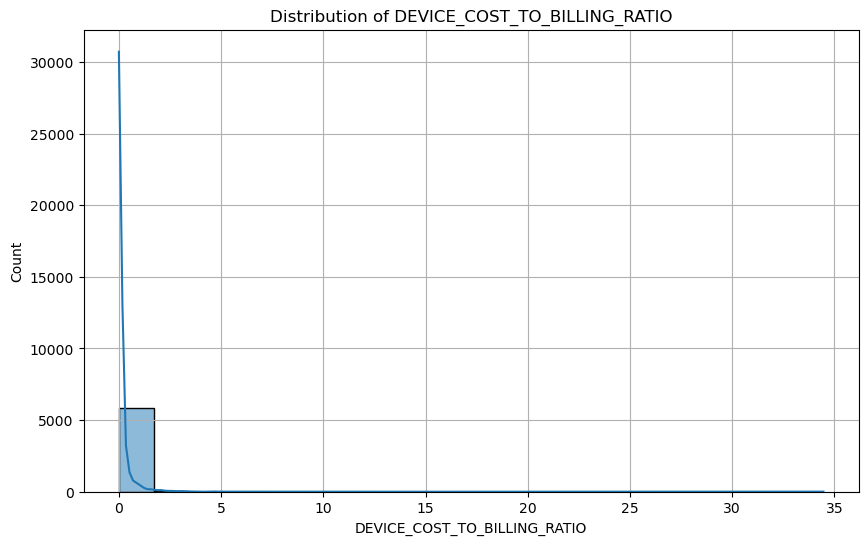

In [115]:
#code create an additional column DEVICE_COST_TO_BILLING_RATIO 
#containing the ratio between DEVICE_COST_MEAN and BILLING_MEAN 
#and plot its distribution.
#Firstly
data_stats_df['DEVICE_COST_TO_BILLING_RATIO'] = data_stats_df['DEVICE_COST_MEAN'] / data_stats_df['BILLING_MEAN']


plt.figure(figsize=(10, 6))
sns.histplot(data_stats_df['DEVICE_COST_TO_BILLING_RATIO'].dropna(), bins=20, kde=True)
plt.title('Distribution of DEVICE_COST_TO_BILLING_RATIO')

plt.grid()
plt.show()
df=data_stats_df.copy()
#display(df)

<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

<font size="+1" color="blue">The distribution ploted is a logarithmic if we observe the kernel density estimator function</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

## 2.7. Text parsing/processing

In [116]:
#display(df.loc[5,'PURCHASED_DEVICE'])#return 'TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07'
#were TGLG29162000 is device code, LG the manufacture name and X210BMW device model
#first divide into space and then the lowbar


PURCHASED_DEVICE = df['PURCHASED_DEVICE']

# First I split by space first to separate the device model and rest
#And then I split the first part (with "[0]" by underscore to separate device code and manufacturer

split_space = PURCHASED_DEVICE.str.split(" ", n=1, expand=True)
split_underscore = split_space[0].str.split("_", expand=True)


# I create the new columns of the dataframe asked
df['PURCHASED_DEVICE_CODE'] = split_underscore[0]
df['PURCHASED_DEVICE_MANUFACTURER'] = split_underscore[1]
df['PURCHASED_DEVICE_MODEL'] = split_space[1]

#comparing before and after the spliting
display(df[['PURCHASED_DEVICE', 'PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']])



,PURCHASED_DEVICE,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [117]:
#code to create two tables: one with the number of devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER 
#and one with the number of devices per manufacturer in PREVIOUS_DEVICE_MANUF

#Similarly, as an exercice asked before, we count each time a purchased device appears, and 

purchased_device_count = df['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()#count each time a purchased device appears and use reset_index() to create the dataframe format data
purchased_device_count.columns = ['Manufacturer', 'Number_of_Devices']#change the name of the columns
display(purchased_device_count)

previous_device_count = df['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
previous_device_count.columns = ['Manufacturer', 'Number_of_Devices']
display(previous_device_count)




,Manufacturer,Number_of_Devices
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2


,Manufacturer,Number_of_Devices
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Lanxun Technology (Hong Kong) Limited,1
63,Beijing Flyscale Technologies Company Limited,1
64,Meizu Technology Co Ltd,1
65,TP-Link Technologies Co Ltd,1


<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

## 2.8. Splitting and sampling a dataset

In [118]:
#code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows

data_seventypercent, data_thirtypercent = train_test_split(df, test_size=0.3)

#print results
print("Data with 70% of rows:")
display(data_seventypercent)

print("Data with 30% of rows:")
display(data_thirtypercent)


Data with 70% of rows:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
1625,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,441.00,20170901.00,3045.66,3045.66,2049.32,2049.32,2201.31,3743.35,5.37,...,120.84,7.49,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
3482,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,5.84,...,120.84,0.00,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2231,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,849.00,NaN,5529.20,4807.17,4807.17,2551.91,3772.70,3459.03,4.99,...,101.00,10.04,0.00,0.00,0.00,0.00,0.00,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9979,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20151201.00,0.00,0.00,0.00,0.00,0.00,0.00,5.88,...,51.99,1.25,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4825,TGAL03462000_ALCATEL 5033J SMART PRETO,345.00,20170301.00,0.00,0.00,0.00,0.00,0.00,0.00,6.08,...,27.99,0.00,0.00,0.00,0.00,0.00,0.00,TGAL03462000,ALCATEL,5033J SMART PRETO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20170801.00,7525.57,9382.22,9382.22,7471.04,10873.72,6823.82,6.29,...,131.14,0.55,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
8146,TGMO37012000_MOTOROLA XT1952 SMARTPHONE INDIGO,561.00,20170301.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,...,121.14,0.44,118.33,142.00,0.00,142.00,0.98,TGMO37012000,MOTOROLA,XT1952 SMARTPHONE INDIGO
7805,TGSA31762000_SAMSUNG N9600 SMART PRETO PPB/PI1...,4353.00,20170301.00,950.24,1121.74,1121.74,801.46,1043.14,495.99,5.13,...,71.89,75.81,67.00,67.00,67.00,0.00,0.77,TGSA31762000,SAMSUNG,N9600 SMART PRETO PPB/PI107/04
3939,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,3813.46,4633.78,4633.78,3459.35,2150.84,984.76,3.98,...,114.99,9.74,41.00,41.00,41.00,0.00,0.35,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


Data with 30% of rows:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
759,TGSA33862000_SAMSUNG A105M SMART PRETO PPB/PI1...,825.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,3.64,...,31.00,2.36,0.00,0.00,0.00,0.00,0.00,TGSA33862000,SAMSUNG,A105M SMART PRETO PPB/PI107/04
2941,TGSA31964007_SAMSUNG J410G SMART PRETO PPB/PI3...,369.00,20140801.00,84.35,226.72,226.72,354.94,271.94,473.89,6.37,...,116.00,0.82,0.00,0.00,0.00,0.00,0.00,TGSA31964007,SAMSUNG,J410G SMART PRETO PPB/PI324/14
9429,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170901.00,0.00,0.00,0.00,0.00,0.00,0.00,3.46,...,47.99,4.93,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2337,TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P...,393.00,20160701.00,1431.05,719.20,719.20,260.39,83.19,300.44,5.53,...,93.00,0.00,0.00,0.00,0.00,0.00,0.00,TGLG29462000,LG,X410BCW SMARTPHONE PRETO PPB/P1769/07
6575,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,561.00,20180401.00,0.00,0.00,0.00,0.00,0.00,0.00,4.60,...,45.30,13.24,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,321.00,20170101.00,247.31,222.64,222.64,429.23,501.27,501.89,3.07,...,38.00,21.93,22.67,34.00,0.00,34.00,0.43,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
5435,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3753.00,20170801.00,38886.76,43951.72,43951.72,24767.52,31305.46,31623.61,6.44,...,72.99,0.00,39.00,39.00,39.00,0.00,0.53,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
2748,DGAP049C2007_APPLE IPHONE 6S 32GB CINZA PPB/P...,1425.00,20170201.00,3464.50,6587.71,6587.71,5210.11,13321.34,4889.87,4.67,...,169.30,0.85,0.00,0.00,0.00,0.00,0.00,DGAP049C2007,APPLE,IPHONE 6S 32GB CINZA PPB/PI643/10
2262,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20170201.00,734.44,674.06,674.06,948.66,784.41,1651.60,4.58,...,130.07,186.47,10.00,12.00,0.00,12.00,0.06,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

In [119]:
#code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) 
#for the variables DATA_TRAFFIC_MONTH_1, VOICE_TRAFFIC_MONTH_1 and BILLING_MONTH_1 in both training and 
#testing parts of the dataset.


# Compute statistics for the training part, with function .describe() that we've used before
print("Training data statistics:\n")
train_data_Traffic = data_seventypercent['DATA_TRAFFIC_MONTH_1'].describe()
train_voice_Traffic = data_seventypercent['VOICE_TRAFFIC_MONTH_1'].describe()
train_billing = data_seventypercent['BILLING_MONTH_1'].describe()
print(train_data_Traffic,"\n")
print(train_voice_Traffic,"\n")
print(train_billing )

print("test data statistics:\n")
test_data_Traffic = data_thirtypercent['DATA_TRAFFIC_MONTH_1'].describe()
test_voice_Traffic = data_thirtypercent['VOICE_TRAFFIC_MONTH_1'].describe()
test_billing = data_thirtypercent['BILLING_MONTH_1'].describe()
print(test_data_Traffic,"\n")
print(test_voice_Traffic,"\n")
print(test_billing )


Training data statistics:

count     4191.00
mean      2563.27
std       5980.34
min          0.00
25%          0.00
50%        361.39
75%       2702.85
max     112421.17
Name: DATA_TRAFFIC_MONTH_1, dtype: float64 

count   4191.00
mean       3.59
std        2.04
min        0.00
25%        2.35
50%        4.14
75%        5.15
max        7.77
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64 

count   4191.00
mean      99.99
std       66.38
min     -124.49
25%       63.33
50%       92.99
75%      121.14
max      926.41
Name: BILLING_MONTH_1, dtype: float64
test data statistics:

count    1797.00
mean     2535.35
std      5264.00
min         0.00
25%         0.00
50%       430.28
75%      2707.05
max     79988.18
Name: DATA_TRAFFIC_MONTH_1, dtype: float64 

count   1797.00
mean       3.63
std        2.03
min        0.00
25%        2.47
50%        4.17
75%        5.11
max        8.32
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64 

count   1797.00
mean      98.51
std       61.56
min     -114.02
25

<font size="+1" color="blue">I observe that statistics for each type between the two splits are slightly different, except for the count, that it has to be different due to we are separating with 70-30 % of the data, so clearly the first split will ahve more data and that implies a higher count</font>

<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

# 3. Comparing iPhone and Samsung J series users

In [120]:
#code to create two dataframes: one with all the attributes of Apple iPhone users and one 
#with all the attributes of Samsung J series users.

# First I create both dataframes for iphone and samsung J models
iphone_df = df[df['PURCHASED_DEVICE_MODEL'].str.contains('iPhone', case=False, na=False)]
samsungJ_df = df[df['PURCHASED_DEVICE_MODEL'].str.startswith('J', na=False)]


print("dataframe with attributes of iPhone users:")
display(iphone_df)
print()
print("Dataframe with attributes of Samsung J users:")
display(samsungJ_df)


dataframe with attributes of iPhone users:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.00,20170101.00,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,5.34,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.00,20170901.00,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,4.64,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.00,20161001.00,3916.90,2703.32,2703.32,1860.90,3112.77,2625.42,5.09,...,192.84,105.96,122.00,183.00,0.00,183.00,0.50,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.00,20170901.00,1017.51,1079.26,1079.26,1178.98,1192.97,1070.23,5.72,...,148.99,39.76,7.00,7.00,7.00,0.00,0.04,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2961.00,20170901.00,257.39,604.09,604.09,1394.24,102.60,107.84,4.77,...,74.99,60.00,7.00,7.00,7.00,0.00,0.08,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3345.00,20171001.00,8028.23,4791.40,4791.40,4890.19,6867.36,4825.10,3.48,...,69.99,3.00,84.23,252.70,0.00,252.70,1.17,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,3636.14,3975.19,3975.19,4893.02,4364.04,3992.30,2.97,...,69.99,0.47,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.00,20170101.00,1023.12,2831.42,2831.42,3015.21,2819.56,1135.82,3.96,...,123.99,3.00,13.00,13.00,13.00,0.00,0.10,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,2432.91,5159.85,5159.85,3041.39,2613.58,2976.49,4.46,...,69.99,0.00,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO



Dataframe with attributes of Samsung J users:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,921.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,5.15,...,113.85,56.53,0.00,0.00,0.00,0.00,0.00,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.00,20160801.00,4.53,464.09,695.10,223.33,223.33,247.85,5.70,...,45.59,24.30,2.50,15.00,0.00,15.00,0.04,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,705.00,20141001.00,8396.93,9907.53,9907.53,5994.02,6872.61,5246.00,5.04,...,146.95,93.09,47.33,71.00,0.00,71.00,0.28,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
57,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1545.00,20140101.00,2047.26,1597.99,1597.99,1501.05,843.06,1631.07,4.32,...,183.99,5.64,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
58,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,873.00,20140101.00,4185.32,2036.57,2036.57,424.27,2934.92,2847.61,4.13,...,112.99,42.95,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20170101.00,5344.53,3875.46,3875.46,2059.95,6818.61,2639.69,6.81,...,78.13,40.40,33.00,33.00,33.00,0.00,0.39,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9966,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1137.00,NaN,4343.87,5593.43,5593.43,4548.75,80.53,1497.05,2.45,...,117.99,3.15,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
9971,TGSA28564007_SAMSUNG J105 SMART PRETO PPB/PI3...,441.00,20180201.00,0.00,0.00,0.00,0.00,0.00,0.00,5.09,...,69.99,8.27,13.00,13.00,13.00,0.00,0.18,TGSA28564007,SAMSUNG,J105 SMART PRETO PPB/PI324/14
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,513.00,20161001.00,5656.49,4798.87,4798.87,5056.85,4584.03,5088.20,4.66,...,102.99,110.23,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04


<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

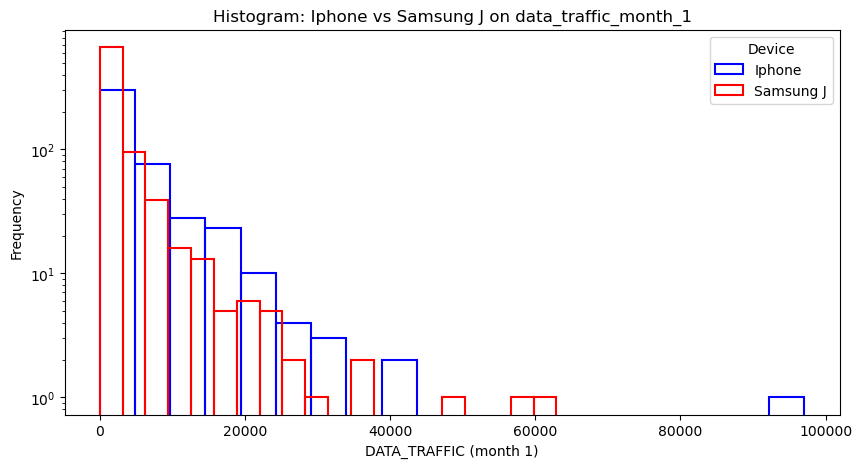

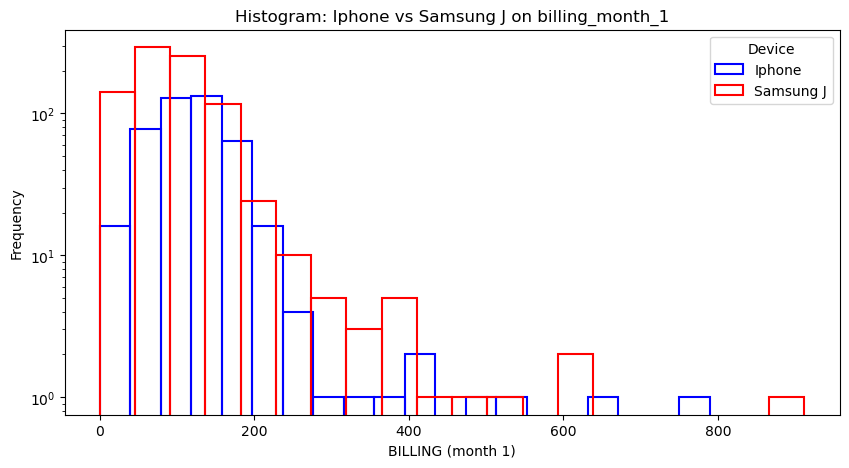

In [121]:
#code to compare some variables between the two datasets. Consider 2 or 3 variables, 
#plot together the histograms of each variable in both datasets (including a legend).


plt.figure(figsize=(10, 5))#size of the plot
plt.yscale('log')#log scale on y axis
sns.histplot(iphone_df['DATA_TRAFFIC_MONTH_1'], bins=20, color='blue', label='Iphone', fill=False)#plot data from month 1
sns.histplot(samsungJ_df['DATA_TRAFFIC_MONTH_1'], bins=20, color='red', label='Samsung J', fill=False)#plot data from month 6
plt.title('Histogram: Iphone vs Samsung J on data_traffic_month_1')

plt.xlabel('DATA_TRAFFIC (month 1)')
plt.ylabel('Frequency')
plt.legend(title='Device')
plt.show()

plt.figure(figsize=(10, 5))#size of the plot
plt.yscale('log')#log scale on y axis
sns.histplot(iphone_df['BILLING_MONTH_1'], bins=20, color='blue', label='Iphone', fill=False)
sns.histplot(samsungJ_df['BILLING_MONTH_1'], bins=20, color='red', label='Samsung J', fill=False)
plt.title('Histogram: Iphone vs Samsung J on billing_month_1')

plt.xlabel('BILLING (month 1)')
plt.ylabel('Frequency')
plt.legend(title='Device')
plt.show()


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

<font size="+1" color="blue">I observe that in both histograms the sape of the data is similar. In the first one, most of the users have low data_traffic and a minority have high traffic. Comparing both type of users, I observe that the Samsung J one's, have less traffic than the Iphone users.
Taking into account the second histogram, with a big part of the users having a low billing amounts. If we compare the two types of users, Samsung J users seem to be  more concentrated at lower levels, whereas iPhone users are less concentrated, and have a higher billing range.</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>